## The Lorenz attractor - RK4 Method

Typical Lorenz Attractor:

Dependence on sigma σ (σ = 5, β = 8/3, ρ = 28), (σ = 20, β = 8/3, ρ = 28).

Dependence on beta β (σ = 10, β = 4/3, ρ = 28), (σ = 10, β = 16/3, ρ = 28).

Dependence on rho ρ (σ = 10, β = 8/3, ρ = 14), (σ = 10, β = 8/3, ρ = 56).

In [1]:
""" Utilities """
import math, sys 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [2]:
"""Compute the time-derivative of a Lorenz system."""
def xt(x, y, z, t):
    return (sigma*(y - x))

def yt(x, y, z, t):
    return (rho*x - y - x*z)

def zt(x, y, z, t):
    return (-1*(beta*z) + x*y)

In [3]:
# choose a different color for each trajectory
#colors = plt.cm.viridis(np.linspace(0, 1, 10))
def lorenz_ode_plot_components (x, y, z):
    plt.figure (figsize = (8.5,8.5))
    plt.plot ( t, x, linewidth = 1, color = 'b' ) 
    plt.plot ( t, y, linewidth = 1, color = 'r' )
    plt.plot ( t, z, linewidth = 1, color = 'g' )
    plt.grid ( True )
    plt.xlabel ( '<--- Time --->' )
    plt.ylabel ( '<--- x(t), y(t), z(t) --->' )
    plt.title ( 'Lorenz Time Series Plot' )
    
    plt.legend(['x','y','z'], loc = 2)
    plt.savefig ( 'lorenz_ode_components.png' )
    plt.show ( )
    return 

def lorenz_ode_plot_3d (x, y, z):
    fig = plt.figure ( figsize = (8.5,8.5))
    ax = fig.gca ( projection = '3d' )
    ax.plot ( x, y, z, linewidth = 0.5, color = 'r' )
    ax.grid ( True )
    ax.set_xlabel ( '<--- x(t) --->' )
    ax.set_ylabel ( '<--- y(t) --->' )
    ax.set_zlabel ( '<--- z(t) --->' )
    ax.set_title ( 'Lorenz 3D Plot' )
    
    plt.savefig ( 'lorenz_ode_3d.png' )
    plt.show ( )
    return

### Dependence sigma, beta, rho using RK4

In [4]:
def RungeKutta4(xt,yt,zt,n = 3500, T = 35):
    
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    t = np.zeros(n+1)
    
    x[0] = 8.0
    y[0] = 1.0
    z[0] = 1.0
    t[0] = 0
    dt = T/float(n) #0.01
    
    #Compute the approximate solution at equally spaced times.
    for k in range (n):
    
        t[k+1] = t[k] + dt
        
        k1 = xt(x[k], y[k], z[k], t[k])
        l1 = yt(x[k], y[k], z[k], t[k])
        m1 = zt(x[k], y[k], z[k], t[k])

        k2 = xt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))
        l2 = yt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))
        m2 = zt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))

        k3 = xt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))
        l3 = yt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))
        m3 = zt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))

        k4 = xt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))
        l4 = yt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))
        m4 = zt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))

        x[k+1] = x[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y[k+1] = y[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z[k+1] = z[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)

    return x, y, z, t

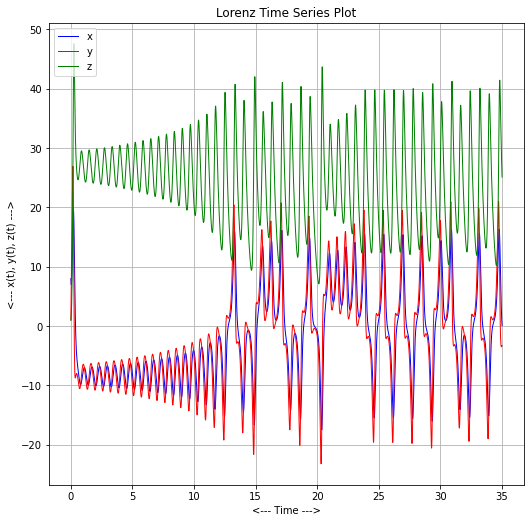

/tmp/ipykernel_7478/181522497.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca ( projection = '3d' )


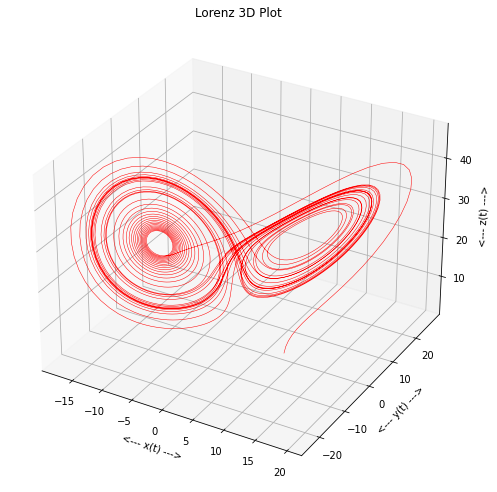

In [5]:
""" Initial values unchanged """
sigma = 10.0
beta = 8.0/3.0
rho = 28.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

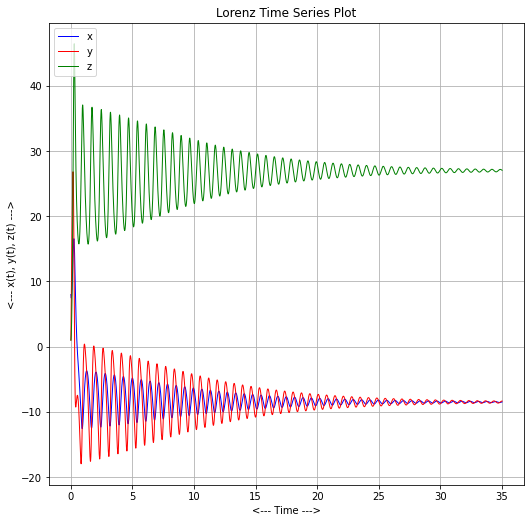

/tmp/ipykernel_12760/181522497.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca ( projection = '3d' )


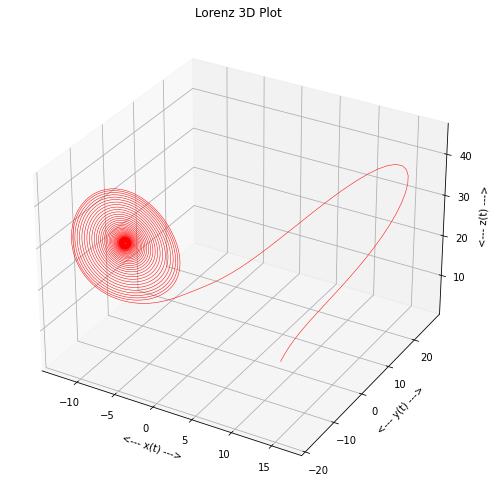

In [7]:
""" First: Dependence on sigma σ using Runge Kutta 4""" 
sigma = 5.0
beta = 8.0/3.0
rho = 28.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

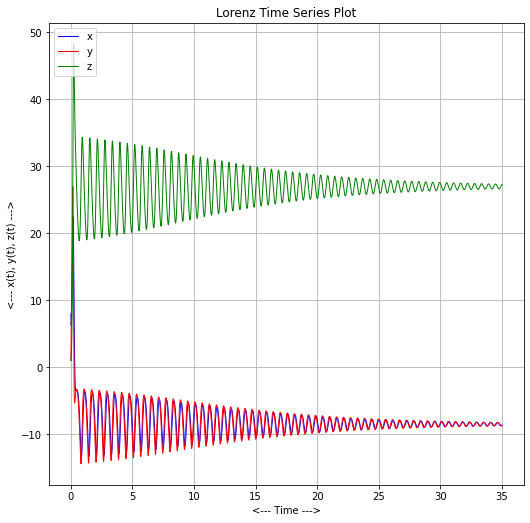

/tmp/ipykernel_12760/181522497.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca ( projection = '3d' )


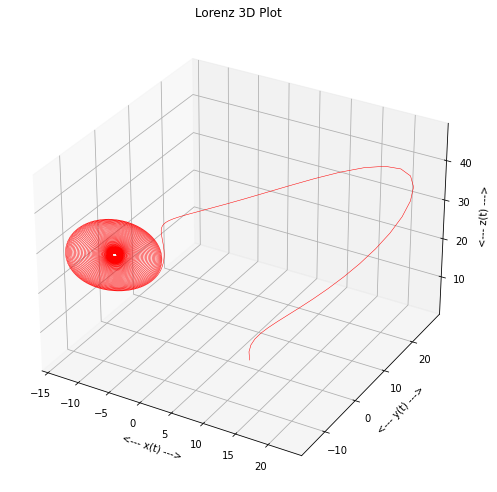

In [8]:
""" Second: Dependence on sigma σ using Runge Kutta 4""" 
sigma = 20.0
beta = 8.0/3.0
rho = 28.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

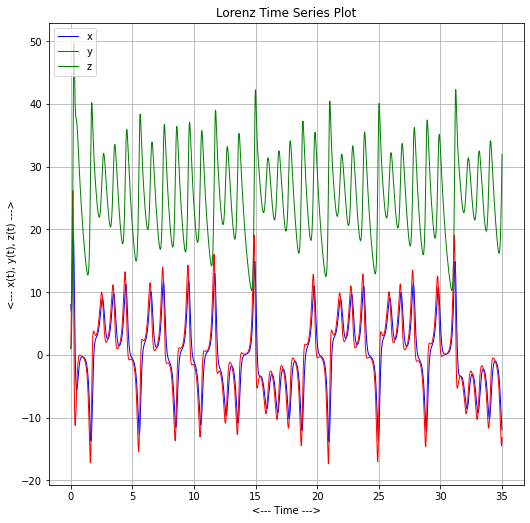

/tmp/ipykernel_12760/181522497.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca ( projection = '3d' )


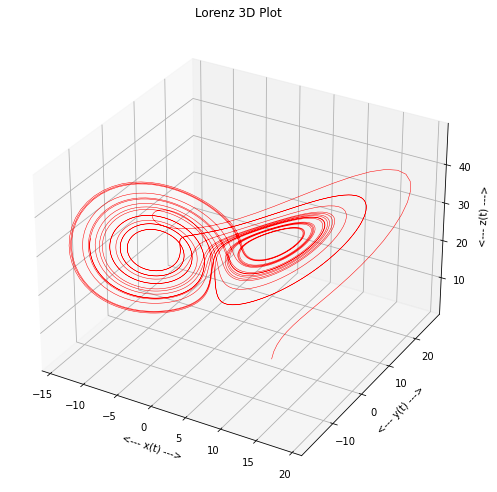

In [9]:
""" First: Dependence on beta β using Runge Kutta 4""" 
sigma = 10.0
beta = 4.0/3.0
rho = 28.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

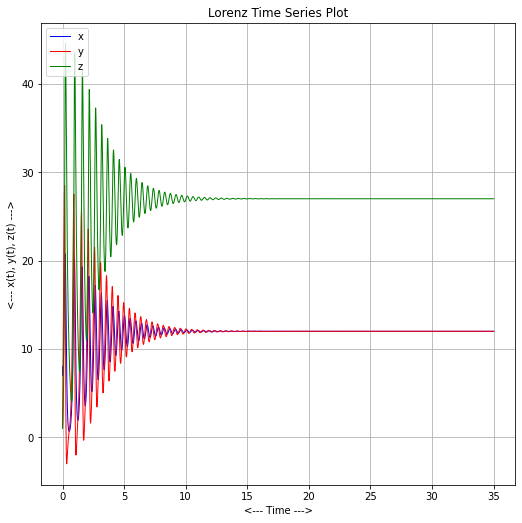

/tmp/ipykernel_12760/181522497.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca ( projection = '3d' )


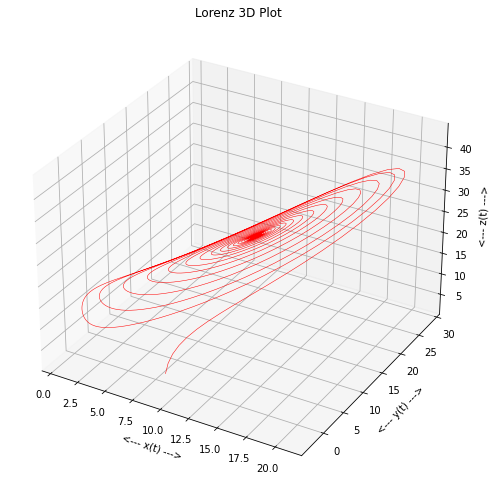

In [10]:
""" Second: Dependence on beta β using Runge Kutta 4""" 
sigma = 10.0
beta = 16.0/3.0
rho = 28.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

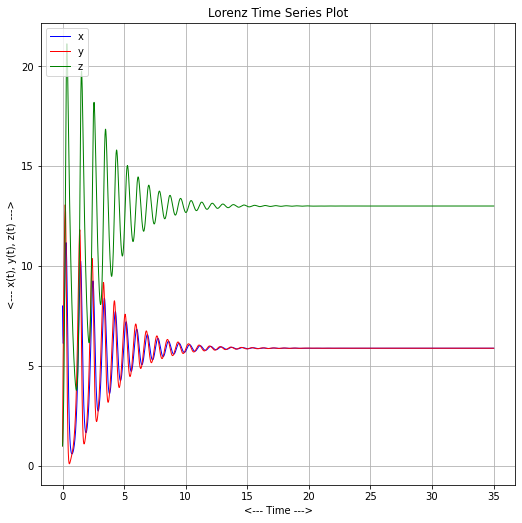

/tmp/ipykernel_12760/181522497.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca ( projection = '3d' )


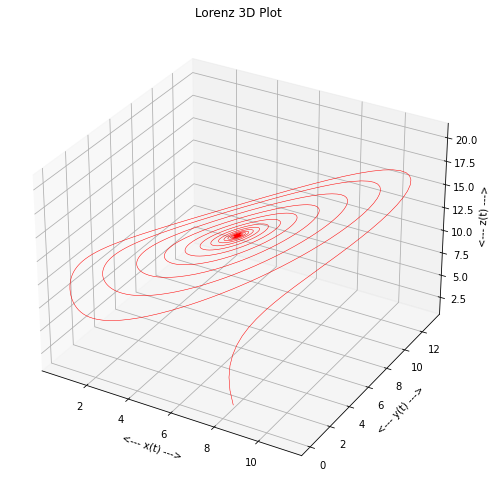

In [11]:
""" First: Dependence on rho ρ using Runge Kutta 4""" 
sigma = 10.0
beta = 8.0/3.0
rho = 14.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

In [ ]:
""" First: Dependence on rho ρ using Runge Kutta 4""" 
sigma = 10.0
beta = 8.0/3.0
rho = 14.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)